In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,r2_score, recall_score, f1_score, precision_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
sns.set_theme(color_codes=True)
from sklearn.tree import DecisionTreeClassifier

In [7]:
df= pd.read_csv("/content/spam.csv", encoding='latin-1')

In [9]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [10]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [15]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [18]:
df.columns= ["label", "message"]

In [19]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df.duplicated().sum()

403

In [24]:
df.drop_duplicates(inplace=True)

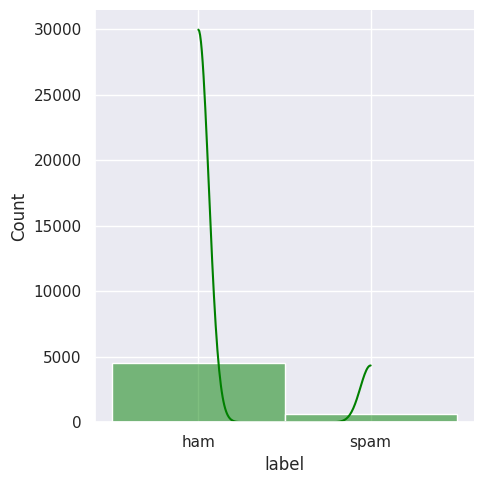

In [25]:
sns.displot(df.label ,kde=True, color="green")

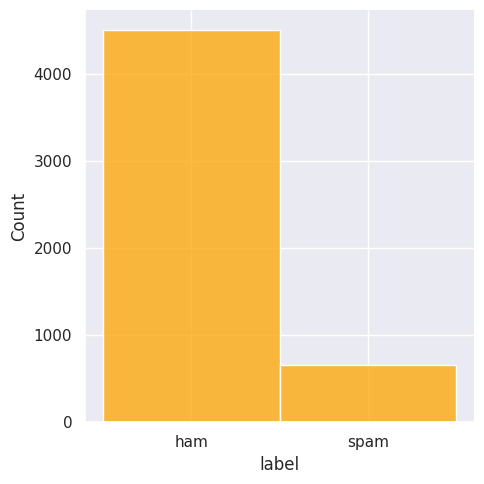

In [26]:
sns.displot(df.label, color="orange")

In [27]:
encoder = LabelEncoder()
df["label"] = encoder.fit_transform(df["label"])

In [31]:
#Tfid Vectorization
Vectorizer = TfidfVectorizer()
X = Vectorizer.fit_transform(df["message"])
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
df.count()

label      5169
message    5169
dtype: int64

In [40]:
y=df["label"]

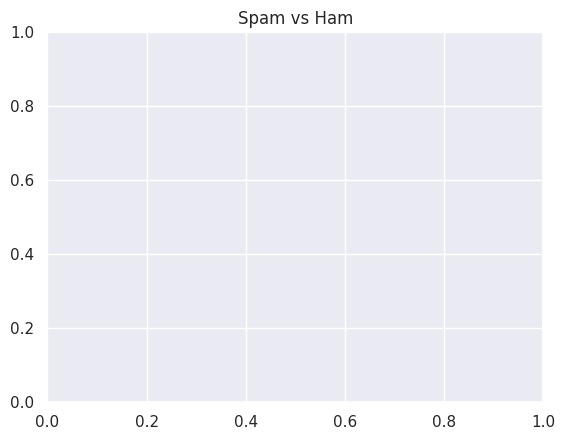

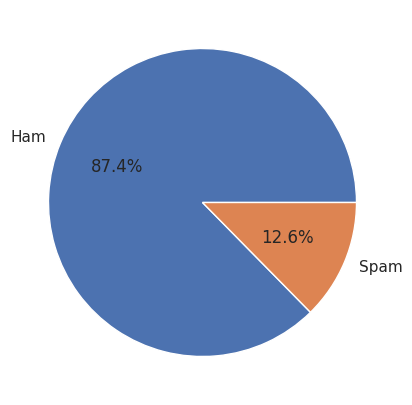

In [34]:
a, k = len(df[df["label"]==0]), len(df[df["label"]==1])
label = np.array(["Ham", "Spam"])
values = np.array([a, k])
plt.title('Spam vs Ham')
plt.figure(figsize=(5,5))
plt.pie(values, labels=label, autopct='%1.1f%%')
plt.show()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=42)

In [44]:
navie_bayes_model= MultinomialNB()
navie_bayes_model.fit(X_train, y_train)

MultinomialNB()

In [47]:
nb_predicition = navie_bayes_model.predict(X_test)

In [51]:
print(confusion_matrix(y_test,nb_predicition))
print(classification_report(y_test,nb_predicition))
print("Accuracy : ",accuracy_score(y_test,nb_predicition))
print("r2_score : ",r2_score(y_test,nb_predicition))
print("recall_score : ",recall_score(y_test,nb_predicition))
print("f1_score : ",f1_score(y_test,nb_predicition))
print("Precision_score: ", precision_score(y_test,nb_predicition))

[[889   0]
 [ 46  99]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       889
           1       1.00      0.68      0.81       145

    accuracy                           0.96      1034
   macro avg       0.98      0.84      0.89      1034
weighted avg       0.96      0.96      0.95      1034

Accuracy :  0.9555125725338491
r2_score :  0.6310150886311625
recall_score :  0.6827586206896552
f1_score :  0.8114754098360656
Precision_score:  1.0


In [52]:
logistic_regression_model= LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

LogisticRegression()

In [53]:
lr_predicition = logistic_regression_model.predict(X_test)

In [55]:
print(confusion_matrix(y_test,lr_predicition))
print(classification_report(y_test,lr_predicition))
print("Accuracy : ",accuracy_score(y_test,lr_predicition))
print("r2_score : ",r2_score(y_test,lr_predicition))
print("recall_score : ",recall_score(y_test,lr_predicition))
print("f1_score : ",f1_score(y_test,lr_predicition))
print("Precision_score: ", precision_score(y_test,nb_predicition))

[[886   3]
 [ 43 102]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       889
           1       0.97      0.70      0.82       145

    accuracy                           0.96      1034
   macro avg       0.96      0.85      0.90      1034
weighted avg       0.96      0.96      0.95      1034

Accuracy :  0.9555125725338491
r2_score :  0.6310150886311625
recall_score :  0.7034482758620689
f1_score :  0.8160000000000001
Precision_score:  1.0


In [58]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [61]:
svm_predicition= svm_model.predict(X_test)

In [62]:
print(confusion_matrix(y_test,svm_predicition))
print(classification_report(y_test,svm_predicition))
print("Accuracy : ",accuracy_score(y_test,svm_predicition))
print("r2_score : ",r2_score(y_test,svm_predicition))
print("recall_score : ",recall_score(y_test,svm_predicition))
print("f1_score : ",f1_score(y_test,svm_predicition))
print("Precision_score: ", precision_score(y_test,svm_predicition))

[[886   3]
 [ 14 131]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.98      0.90      0.94       145

    accuracy                           0.98      1034
   macro avg       0.98      0.95      0.96      1034
weighted avg       0.98      0.98      0.98      1034

Accuracy :  0.9835589941972921
r2_score :  0.8636360110158644
recall_score :  0.903448275862069
f1_score :  0.939068100358423
Precision_score:  0.9776119402985075
